# Лабораторная работа №3
рынок: **Китай** <br>
период: **2018 год**

Седунов Илья, <br>
Альперович Вадим, <br>
Славутин Александр, <br>
17ПМИ.

In [3]:
import random
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import warnings
import seaborn as sns
from seaborn import set_style
set_style('dark')
warnings.simplefilter('ignore')

### Подготовка модели.

- Выберите на рынке 20 активов (N=20).

- По наблюдениям за 2018 год оцените математические ожидания доходностей и матрицу ковариаций доходностей (используйте выборочную матрицу ковариаций). 

- Найденные вектор средних и матрица ковариаций будут далее использованы в экспериментах как «истинные» вектор E=(E1, E2, …, EN) и матрица ковариаций (σi,j).

- Убедитесь, что матрица ковариаций невырожденная (если она близка к вырожденной, то измените состав активов). 


In [383]:
# Сбор случайных 250 активов Китайского рынка за 2018 год

# random.seed(100)

df = pd.read_excel('data/china_stocks.xlsx').drop_duplicates(['Symbol'])
symbols = list(df['Symbol'])
symbols = random.choices(symbols, k=1000)
print('Количество китайских тикеров =', len(symbols))

Количество китайских тикеров = 1000


In [384]:
from IPython.display import clear_output
start = "2018-01-01"
end   = "2018-12-31"
stocks = {}

for symbol in tqdm_notebook(symbols):
    stock = yf.download(symbol, start=start, end=end, progress=False)
    if stock[~np.isnan(stock['Close'])].shape[0] < 220:
        print('Drop because of nan values', symbol)
        continue
    stock['return'] = stock['Close'] / stock['Close'].shift(1)
    stock['log_return'] = np.log(stock['return'])
    stocks[symbol] = stock
clear_output()
print('Акции собраны!')

# удаление пустых записей

for symbol in symbols:
    try:
        stocks[symbol] = stocks[symbol].dropna()
    except:
        continue

Акции собраны!


In [385]:
# сбор общей статистики

stock_stat = pd.DataFrame(columns=['symbol',  'E', 'Sigma', 'mean_vol', 'n_observations'])
for symbol in tqdm_notebook(symbols):
    try:
        stock = stocks[symbol].dropna()
        stock_stat.loc[symbol] = [symbol,
                                  stock['log_return'].mean(),
                                  stock['log_return'].std(), 
                                  stock['Volume'].mean(), 
                                  len(stock)]
    except:
        continue
stock_stat.dropna(inplace=True)
print('Осталось активов после обработки', len(stock_stat))


Осталось активов после обработки 789


In [403]:
def get_return_mean_cov(df, sse_components=False): 
    # получить по выбранным активам матрицу их доходностей, 
    # вектор средних доходностей и матрицу ковариации
    
    r_matrix = {}
    if sse_components:
        for i in range(len(df)):
            symbol = df.index[i]
            r_matrix[symbol] = sse_stocks[symbol]['log_return']
    else:
        for symbol in df['symbol']:
            r_matrix[symbol] = stocks[symbol]['log_return'] 
    r_df = pd.DataFrame(r_matrix).dropna()
    return r_df.values, r_df.mean().values, r_df.cov().values

def plot_mean_var_map(df,x='Sigma', y='E', title='Карта активов:σ от E', figsize=(12, 6)):
    # получить карту риск от дохоности
    
    ax = df.plot(x=x, y=y, s=np.log(df['mean_vol']**3), 
                          kind='scatter', 
                          figsize=figsize, 
                          edgecolor='black',
                          grid=True)
    plt.xlabel('Sigma', size=15)
    plt.ylabel('E', size=15)
    plt.title(title, size=16)

Выберем 20 активов с наибольшей платой за риск

In [408]:
stock_stat['sharp'] = (stock_stat.E)**2 / stock_stat.Sigma
selected20 = stock_stat.sort_values(['sharp'], ascending=False).iloc[:20]
selected20

,symbol,E,Sigma,mean_vol,n_observations,sharp
300253.SZ,300253.SZ,0.002496,0.035459,3.930903e+07,242,4.387544e-07
002493.SZ,002493.SZ,0.002565,0.042951,6.305511e+06,242,3.927145e-07
300684.SZ,300684.SZ,0.002879,0.066310,6.448567e+06,242,3.598880e-07
000860.SZ,000860.SZ,0.002107,0.034167,1.468111e+07,242,2.739253e-07
300451.SZ,300451.SZ,0.001969,0.036965,2.510828e+07,242,2.066502e-07
300012.SZ,300012.SZ,0.001625,0.028842,2.107810e+07,242,1.488628e-07
600132.SS,600132.SS,0.001559,0.028038,3.242524e+06,242,1.352598e-07
600763.SS,600763.SS,0.001619,0.032272,4.122048e+06,242,1.315653e-07
601888.SS,601888.SS,0.001386,0.029371,1.113734e+07,242,9.056902e-08
300595.SZ,300595.SZ,0.001268,0.031358,3.464182e+06,242,6.508686e-08


Получим вектор средних и выборчную матрицу ковариации выбранных акций

In [409]:
return_matrix, mean_vec, cov_matrix = get_return_mean_cov(selected20) 
return_matrix.shape, mean_vec.shape, cov_matrix.shape

((242, 20), (20,), (20, 20))

Посмотрим на вектор собственных значений

In [410]:
np.around(np.linalg.eigvals(cov_matrix),4)

array([0.0077, 0.0035, 0.0031, 0.002 , 0.0017, 0.0016, 0.0013, 0.0007,
       0.0007, 0.0002, 0.0002, 0.0006, 0.0003, 0.0003, 0.0006, 0.0005,
       0.0004, 0.0004, 0.0004, 0.0005])

Попытаемся выбрать активы с наибольшим минимальным собственным значением

In [427]:
gen_lst = []
for i in tqdm_notebook(range(10000)):
    selected20 = stock_stat.sample(200).sort_values(['sharp'], ascending=False).iloc[:20]
    return_matrix, mean_vec, cov_matrix = get_return_mean_cov(selected20) 
    min_eigen_val = np.min(np.linalg.eigvals(cov_matrix))
    gen_lst.append((min_eigen_val, selected20))

In [492]:
gen_lst = sorted(gen_lst, key=lambda x: x[0], reverse=True)
selected20 = gen_lst[0][1]
return_matrix, mean_vec, cov_matrix = get_return_mean_cov(selected20) 
np.around(np.linalg.eigvals(cov_matrix),4)

array([0.0067, 0.0031, 0.0017, 0.0016, 0.0014, 0.0012, 0.001 , 0.0009,
       0.0008, 0.0003, 0.0003, 0.0004, 0.0007, 0.0007, 0.0006, 0.0006,
       0.0005, 0.0004, 0.0005, 0.0005])

### 1. Истинный оптимальный портфель в модели Марковица с заданным отношением к риску. 

Задана константа b. Решите задачу оптимизации 

$$-E(x)+ b\sigma(x) \rightarrow min,$$   $$x_1+x_2+\cdots+x_N =1$$ $$x_i \ge 0$$
    
(т.е. найдите оптимальный портфель с отношением к риску, равным b). Найдите и зафиксируйте веса портфеля и значение целевой функции. 

Здесь $E(x)= E_1 x_1+E_2 x_2+\cdots+E_N x_N$ , $ \sigma (x)= \sum \sum σ_{ij} x_ix_j$


**Примечание 1.**

Константа b подобрана таким образом, что истинный оптимальный CVaR портфель совпадает с истинным оптимальным портфелем п.1. Значение константы смотри в упражнениях к теме

$$b= \frac{1}{\sqrt{2\pi}}\frac{1}{\sqrt{1-\beta}}exp(-\frac{(\Phi^{-1}(\beta))^2)}{2})$$

In [471]:
def risk_portfolio(X, cov_matrix):
    return np.sqrt(np.dot(np.dot(X, cov_matrix), X.T))
    
def objective_function(X, returns, mean_vec, cov_matrix, b):
    return (-np.dot(mean_vec, X)) + b * np.dot(np.dot(X, cov_matrix), X.T)
    
def optimize_portfolio(returns, 
                       mean_vec,
                       cov_matrix, 
                       b, 
                       bounds, 
                       objective_function=objective_function):
    N = cov_matrix.shape[0]
    X = np.ones(N)
    X = X / X.sum()
    bounds = bounds * N
    
    constraints=[]
    constraints.append({'type': 'eq', 
                        'fun': lambda X: np.sum(X) - 1.0})
    
    return minimize(objective_function, X,
                    args=(returns, mean_vec, cov_matrix, b), method='SLSQP',
                    constraints=constraints,
                    bounds=bounds).x

In [486]:
from scipy.optimize import minimize

b = 6
X = optimize_portfolio(return_matrix, mean_vec, cov_matrix, b, bounds=((0, 1),))

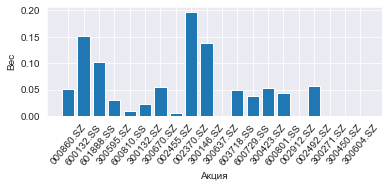

In [487]:
def plot_weights_histogram(weights, data):
    plt.figure(figsize=(6,2))
    try:
        x_values = data['symbol'].values
    except:
        x_values = data['names'].values
    x = np.arange(len(weights))
    plt.xlabel('Акция')
    plt.ylabel('Вес')
    height = weights
    plt.bar(x, height=height)
    plt.xticks(x, x_values, rotation='50')
    plt.grid()
    
plot_weights_histogram(X, selected20)

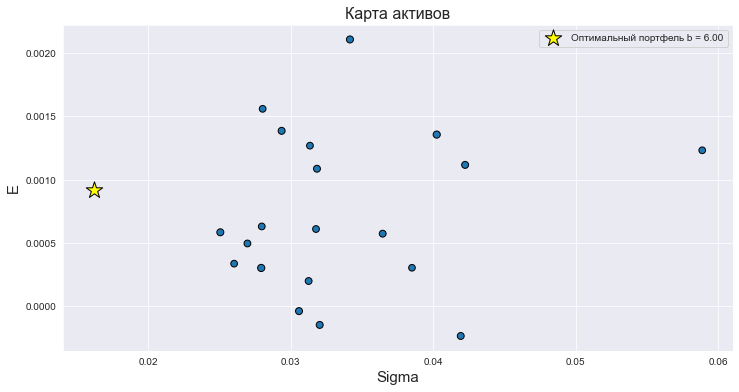

In [488]:
plot_mean_var_map(selected20, title='Карта активов')



plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)
plt.legend()
pass

### 2. Оценка неопределенности оптимального портфеля в модели Марковица с заданным отношением к риску. 

**2.1. Задайте число наблюдений T=30.**

С помощью генератора многомерного нормального распределения создайте выборку размера Т из нормального распределения с вектором математических ожиданий  E=(E1, E2, …, EN) и матрицей ковариаций (σi,j).

**2.2. По построенной выборке сделайте оценку Eest вектора математических ожиданий и оценку (σesti,j) матрицы ковариаций.**


**2.3 Используя эти оценки решите задачу оптимизации**

-Eest(x)+ b σest(x) -> min,  x1+x2+…+xN =1,  xi≥0

Здесь Eest(x)= Eest1 x1+ Eest2 x2+…+ EestN xN , [σest(x)]2 =∑∑ σest i,j xixj
(т.е. найдите выборочный оптимальный портфель с отношением к риску, равным b). Найдите и зафиксируйте веса портфеля и значение целевой функции.

**2.4 Сравните два портфеля: истинный (п.1) и выборочный (п.2.3).**

Оцените относительную ошибку в определении весов портфеля в норме Manhattan (L1 норма Минковского). Сделайте выводы. Сделайте сравнение в системе координат (σ, E).

**2.5. Повторите эксперимент S=40 раз и оцените среднюю относительную ошибку по S повторениям эксперимента.**

Сделайте выводы.  

Сделайте сравнение в системе координат (σ, E). 

**2.6  Предположите, что нам известны точные значения математических ожиданий E=(E1, E2, …, EN).**

Повторите пп. 2.2-2.5. используя оценку только матрицы ковариаций (т.е. решайте задачу оптимизации 

-E(x)+ b σest(x) -> min,  x1+x2+…+xN =1,  xi≥0

Здесь E(x)= E1 x1+E2 x2+…+EN xN , [σest(x)]2 =∑∑ σest i,j xixj 

Сравните точность этих портфелей и портфелей п.2.3